In [ ]:
'''
https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb
'''

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# Install Dependencies and Setup

In [4]:
import tensorflow as tf
import os

In [5]:
import cv2
import imghdr

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Remove dodgy images

In [ ]:
data_dir = '/content/drive/MyDrive/Nandita/Deep learning project/data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
i=0
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            i+=1
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)
print(i)

0


# Load Data

In [6]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Nandita/Deep learning project/data')


Found 765 files belonging to 2 classes.


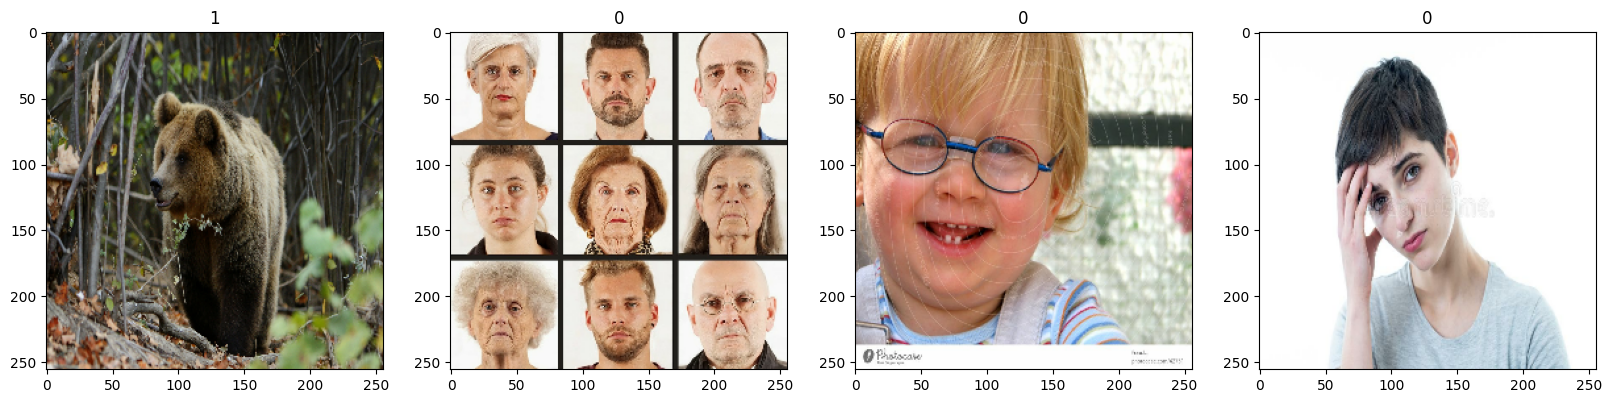

In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale Data

In [7]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()


(array([[[[0.4655994 , 0.47344252, 0.46952096],
          [0.49158242, 0.49942556, 0.495504  ],
          [0.483678  , 0.48759958, 0.49544272],
          ...,
          [0.28167772, 0.28167772, 0.28952086],
          [0.26232335, 0.26232335, 0.2701665 ],
          [0.27354735, 0.27354735, 0.2813905 ]],
 
         [[0.4802081 , 0.48805124, 0.48412967],
          [0.49997008, 0.5078132 , 0.50389165],
          [0.5063814 , 0.51030296, 0.5181461 ],
          ...,
          [0.32389706, 0.32389706, 0.3317402 ],
          [0.3106541 , 0.3106541 , 0.31849724],
          [0.29789394, 0.29789394, 0.30573708]],
 
         [[0.50339526, 0.5112384 , 0.5073168 ],
          [0.5142923 , 0.52213544, 0.51821387],
          [0.52678007, 0.53070164, 0.5385448 ],
          ...,
          [0.33488962, 0.33488962, 0.34273276],
          [0.3150977 , 0.3150977 , 0.32294086],
          [0.33045557, 0.33045557, 0.3382987 ]],
 
         ...,
 
         [[0.45128772, 0.45128772, 0.44344458],
          [0.46405

# Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
#print(train_size)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

16


In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Train

In [ ]:
logdir='/content/drive/MyDrive/Nandita/Deep learning project/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 42s 2s/step - loss: 0.7023 - accuracy: 0.6875 - val_loss: 0.5505 - val_accuracy: 0.7891
Epoch 2/20
16/16 [==============================] - 38s 2s/step - loss: 0.4461 - accuracy: 0.8086 - val_loss: 0.3838 - val_accuracy: 0.8594
Epoch 3/20
16/16 [==============================] - 37s 2s/step - loss: 0.3782 - accuracy: 0.8379 - val_loss: 0.5109 - val_accuracy: 0.7266
Epoch 4/20
16/16 [==============================] - 39s 2s/step - loss: 0.3444 - accuracy: 0.8516 - val_loss: 0.3754 - val_accuracy: 0.8672
Epoch 5/20
16/16 [==============================] - 38s 2s/step - loss: 0.2708 - accuracy: 0.8770 - val_loss: 0.2457 - val_accuracy: 0.8984
Epoch 6/20
16/16 [==============================] - 38s 2s/step - loss: 0.3035 - accuracy: 0.8691 - val_loss: 0.3164 - val_accuracy: 0.8594
Epoch 7/20
16/16 [==============================] - 35s 2s/step - loss: 0.2017 - accuracy: 0.9238 - val_loss: 0.3943 - val_accuracy: 0.8047
Epoch 8/20
16/16 [==

# Plot Performance

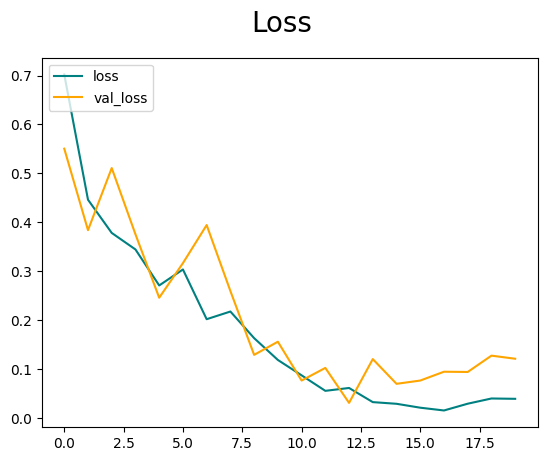

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

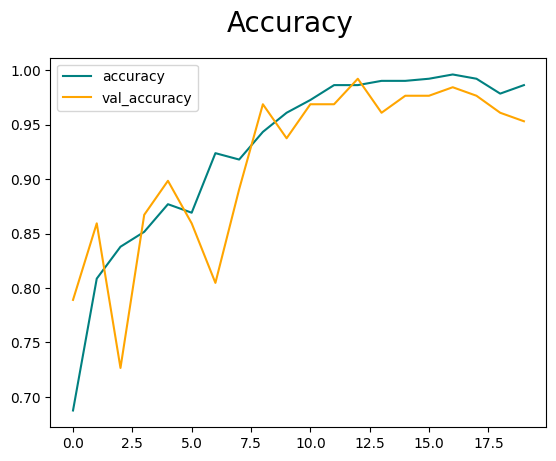

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


# Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 29ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9512195, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.96875, shape=(), dtype=float32)


# Test

In [ ]:
import cv2

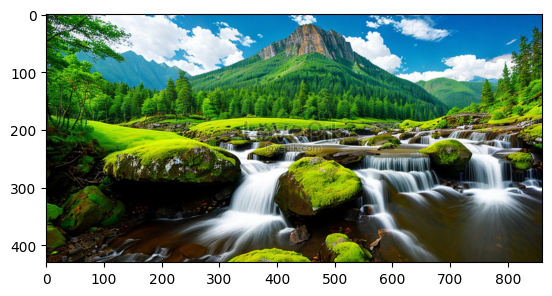

In [8]:
img = cv2.imread('/content/drive/MyDrive/Nandita/Deep learning project/data/Not_Human/0650.jpg_wh860.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


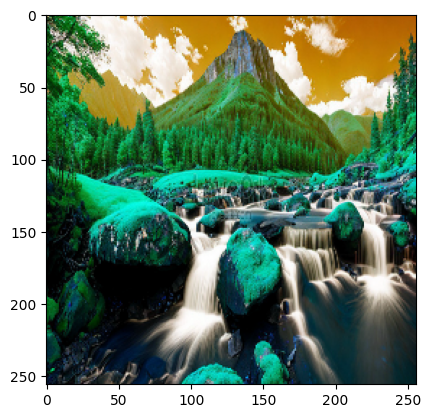

In [19]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [25]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 1s 1s/step


In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Not_Human')
else:
    print(f'Predicted class is Human')

Predicted class is Not_Human


#  Save the Model

In [21]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/Nandita/Deep learning project/models','imageclassifier.h5'))

In [24]:
new_model = load_model('/content/drive/MyDrive/Nandita/Deep learning project/models/imageclassifier.h5')
#model = load_model('/content/drive/MyDrive/Nandita/Deep learning project/models/imageclassifier.h5')

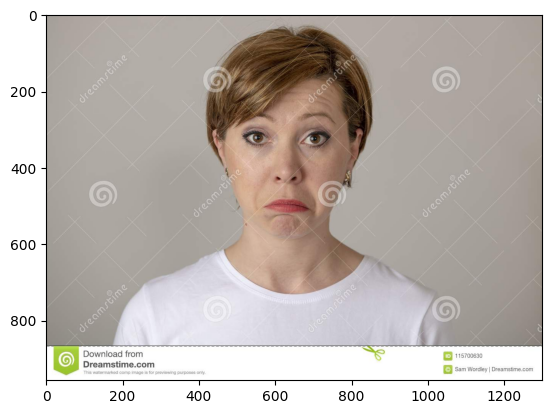

In [26]:
img = cv2.imread('/content/drive/MyDrive/Nandita/Deep learning project/data/Human/-woman-sad-face-looking-unhappy-camera-close-up-portrait-beautiful-115700630.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

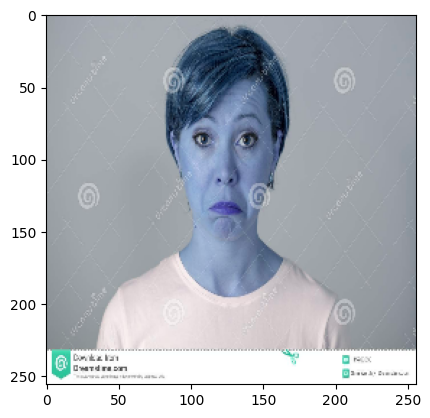

In [28]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Not_Human')
else:
    print(f'Predicted class is Human')

Predicted class is Human
